## 1. Import the necessary libraries.

In [43]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from matplotlib.colors import BASE_COLORS
%matplotlib inline

## 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [44]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

## 3. First look at its main features (head, shape, info).

In [45]:
customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [46]:
customer_df.shape

(9134, 24)

In [47]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## 4. Rename the columns so they follow the PE8 (snake case)

https://www.python.org/dev/peps/pep-0008/ \ PE8 -- Style Guide for Python Code

In [48]:
new_cols = [col.replace(" ", "_").lower() for col in customer_df]
customer_df.columns = new_cols

## 5. Change effective to date column to datetime format.

In [49]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

## 6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [50]:
customer_df['income'] = customer_df['income'].astype(float)
type(customer_df['income'][0])

numpy.float64

In [51]:
def filtering(x):
    discrete_df = customer_df.select_dtypes('int64')
    continuous_df = customer_df.select_dtypes('float64')
    return discrete_df, continuous_df

discrete_df, continuous_df = filtering(customer_df)

In [52]:
discrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   monthly_premium_auto           9134 non-null   int64
 1   months_since_last_claim        9134 non-null   int64
 2   months_since_policy_inception  9134 non-null   int64
 3   number_of_open_complaints      9134 non-null   int64
 4   number_of_policies             9134 non-null   int64
dtypes: int64(5)
memory usage: 356.9 KB


In [53]:
continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_lifetime_value  9134 non-null   float64
 1   income                   9134 non-null   float64
 2   total_claim_amount       9134 non-null   float64
dtypes: float64(3)
memory usage: 214.2 KB


## 7. Plot a correlation matrix, comment what you see.

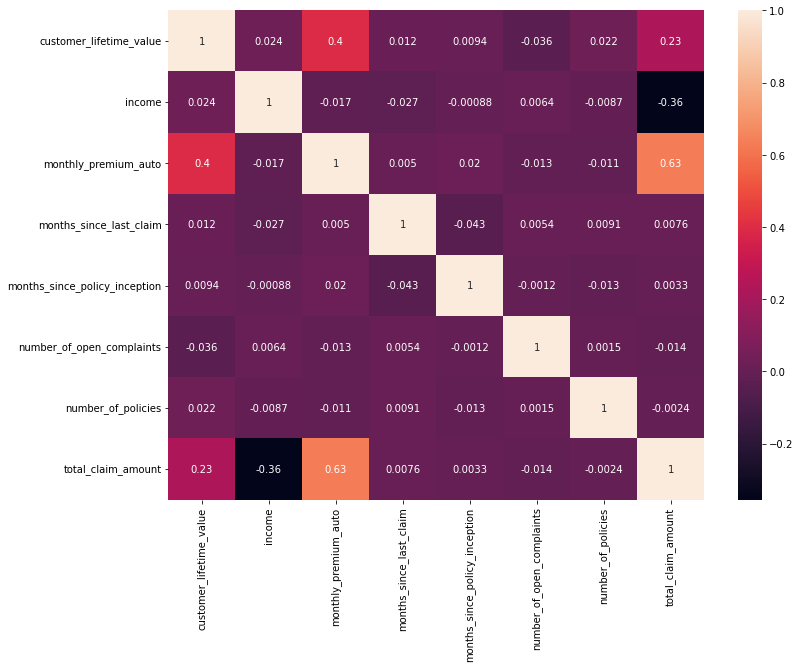

In [54]:
plt.figure(figsize=(12, 9))
correlations_matrix = customer_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

## 8. Create a function to plot every discrete variable.  Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

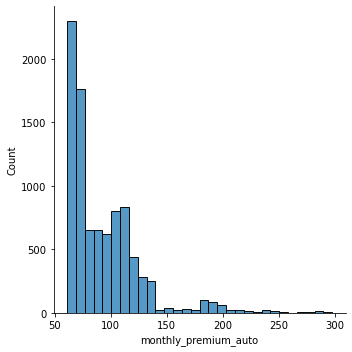

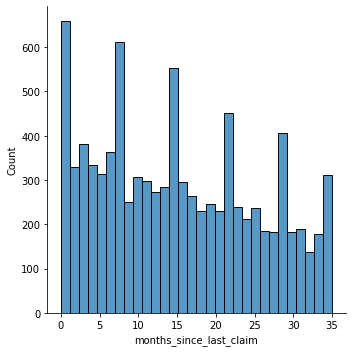

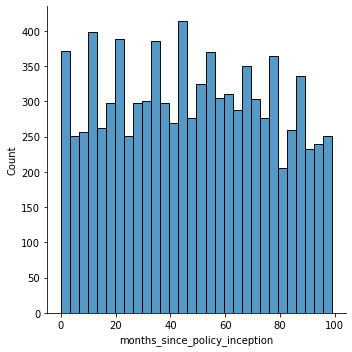

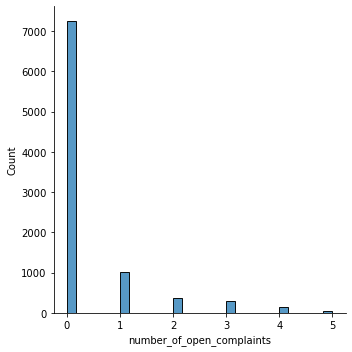

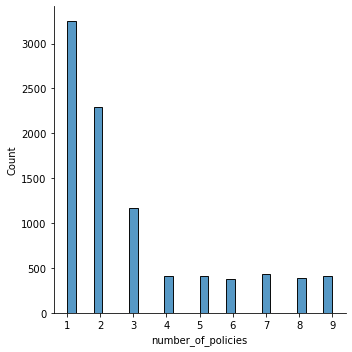

In [55]:
for i in discrete_df.columns:
    sns.displot(x = i, data = discrete_df, bins=30)
    plt.show()

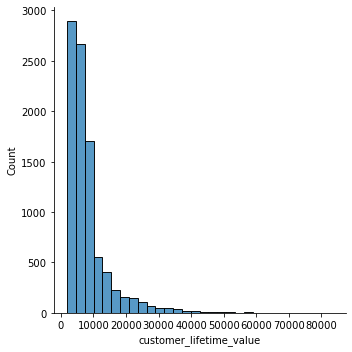

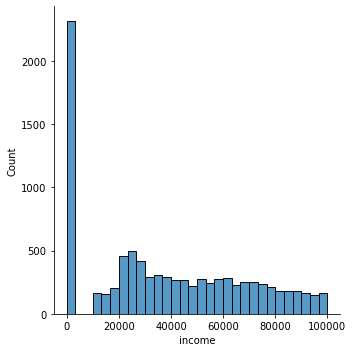

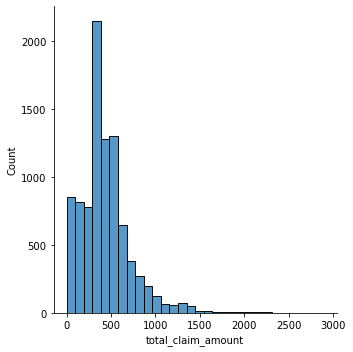

In [56]:
for i in continuous_df.columns:
    sns.displot(x = i, data = continuous_df, bins=30)
    plt.show()

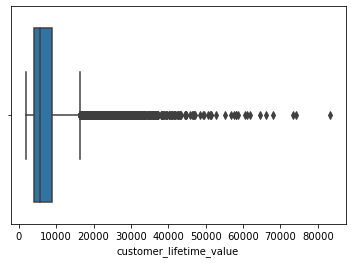

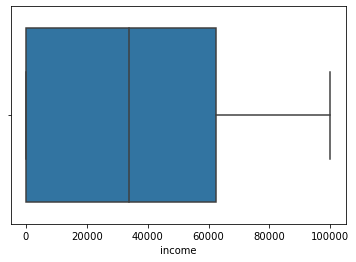

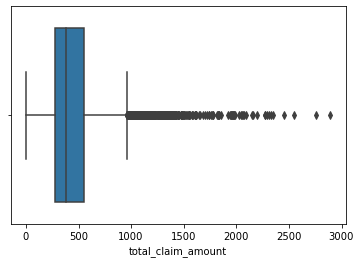

In [57]:
for i in continuous_df.columns:
    sns.boxplot(x = i, data = continuous_df)
    plt.show()

## 9. Comment what you can see in the plots.

'''Continous. Customer_liftime_value and Totalclaim_amount seems to be very similar distributed. We find pretty much 'outliers' for this two variables. Not outliers in the income value.
'''

## 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [58]:
# already done above. 

## 11 . Did you find outliers? Comment what you will do with them.

'''there seems to be some outliers values in the »Customer_life_column« and »Total_claim_amount«. 
will check them to decide what to do with these values, but initally.
'''

## 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [59]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## The End

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions

Open the categoricals variable we created before. categoricals = data.select_dtypes(np.object) categoricals.head()

Plot all the categorical variables with the proper plot. What can you see? There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

Plot time variable. Can you extract something from it?

In [60]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [ ]:
new_cols = [col.replace(" ", "_").lower() for col in customer_df]
customer_df.columns = new_cols

In [ ]:
#Open the categoricals variable we created before. 
categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

# Plot all the categorical variables with the proper plot. What can you see? 

In [64]:
categoricals.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

<AxesSubplot:xlabel='Vehicle Size', ylabel='count'>

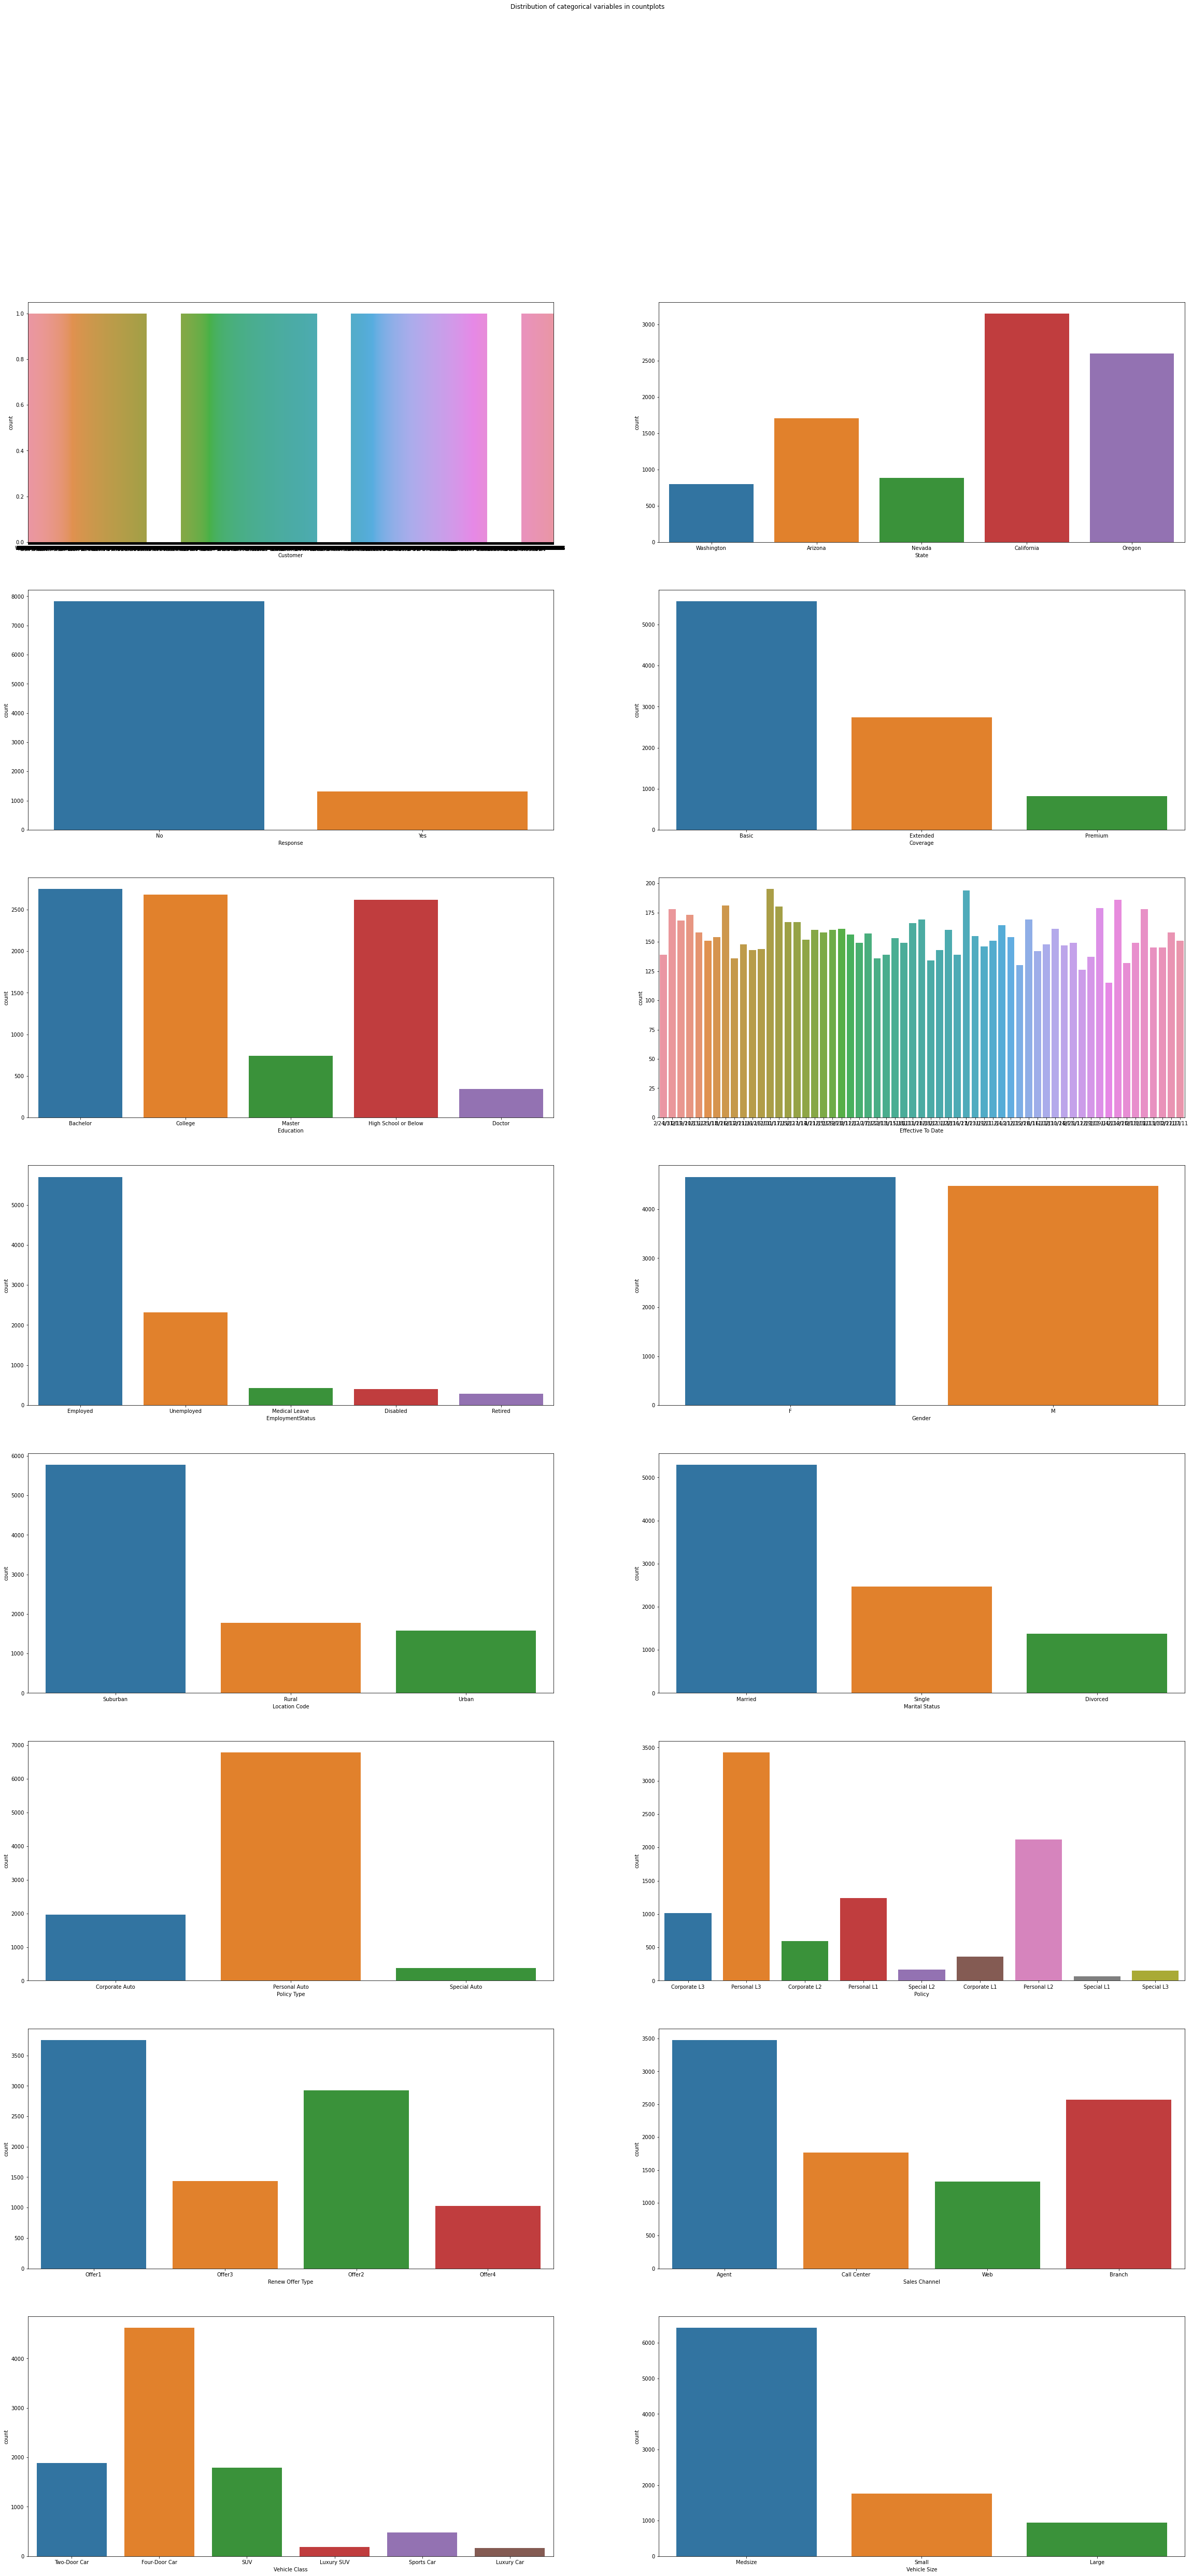

In [91]:
fig, axes = plt.subplots(8,2,  figsize=(40, 80))

fig.suptitle('Distribution of categorical variables in countplots')

sns.countplot(ax=axes[0,0],data= categoricals, x= 'Customer')
sns.countplot(ax=axes[0,1],data= categoricals, x= 'State')
sns.countplot(ax=axes[1,0],data= categoricals, x= 'Response')
sns.countplot(ax=axes[1,1],data= categoricals, x= 'Coverage')
sns.countplot(ax=axes[2,0],data= categoricals, x= 'Education')
sns.countplot(ax=axes[2,1],data= categoricals, x= 'Effective To Date')
sns.countplot(ax=axes[3,0],data= categoricals, x= 'EmploymentStatus')
sns.countplot(ax=axes[3,1],data= categoricals, x= 'Gender')
sns.countplot(ax=axes[4,0],data= categoricals, x= 'Location Code')
sns.countplot(ax=axes[4,1],data= categoricals, x= 'Marital Status')
sns.countplot(ax=axes[5,0],data= categoricals, x= 'Policy Type')
sns.countplot(ax=axes[5,1],data= categoricals, x= 'Policy')
sns.countplot(ax=axes[6,0],data= categoricals, x= 'Renew Offer Type')
sns.countplot(ax=axes[6,1],data= categoricals, x= 'Sales Channel')
sns.countplot(ax=axes[7,0],data= categoricals, x= 'Vehicle Class')
sns.countplot(ax=axes[7,1],data= categoricals, x= 'Vehicle Size')

In [69]:
#There might be some columns that seem to be redundant, check their values to be sure. 
#What should we do with them?
data_crosstab = pd.crosstab(customer_df['Coverage'], customer_df['Marital Status'], margins = False)
data_crosstab

Marital Status,Divorced,Married,Single
Coverage,,,
Basic,825,3247,1496
Extended,427,1573,742
Premium,117,478,229


In [70]:
st.chi2_contingency(data_crosstab)

(1.5917156364713243,
 0.810280319861366,
 4,
 array([[ 834.52945041, 3229.61068535, 1503.85986424],
        [ 410.96978323, 1590.44405518,  740.58616159],
        [ 123.50076637,  477.94525947,  222.55397416]]))

<AxesSubplot:xlabel='Effective To Date', ylabel='Count'>

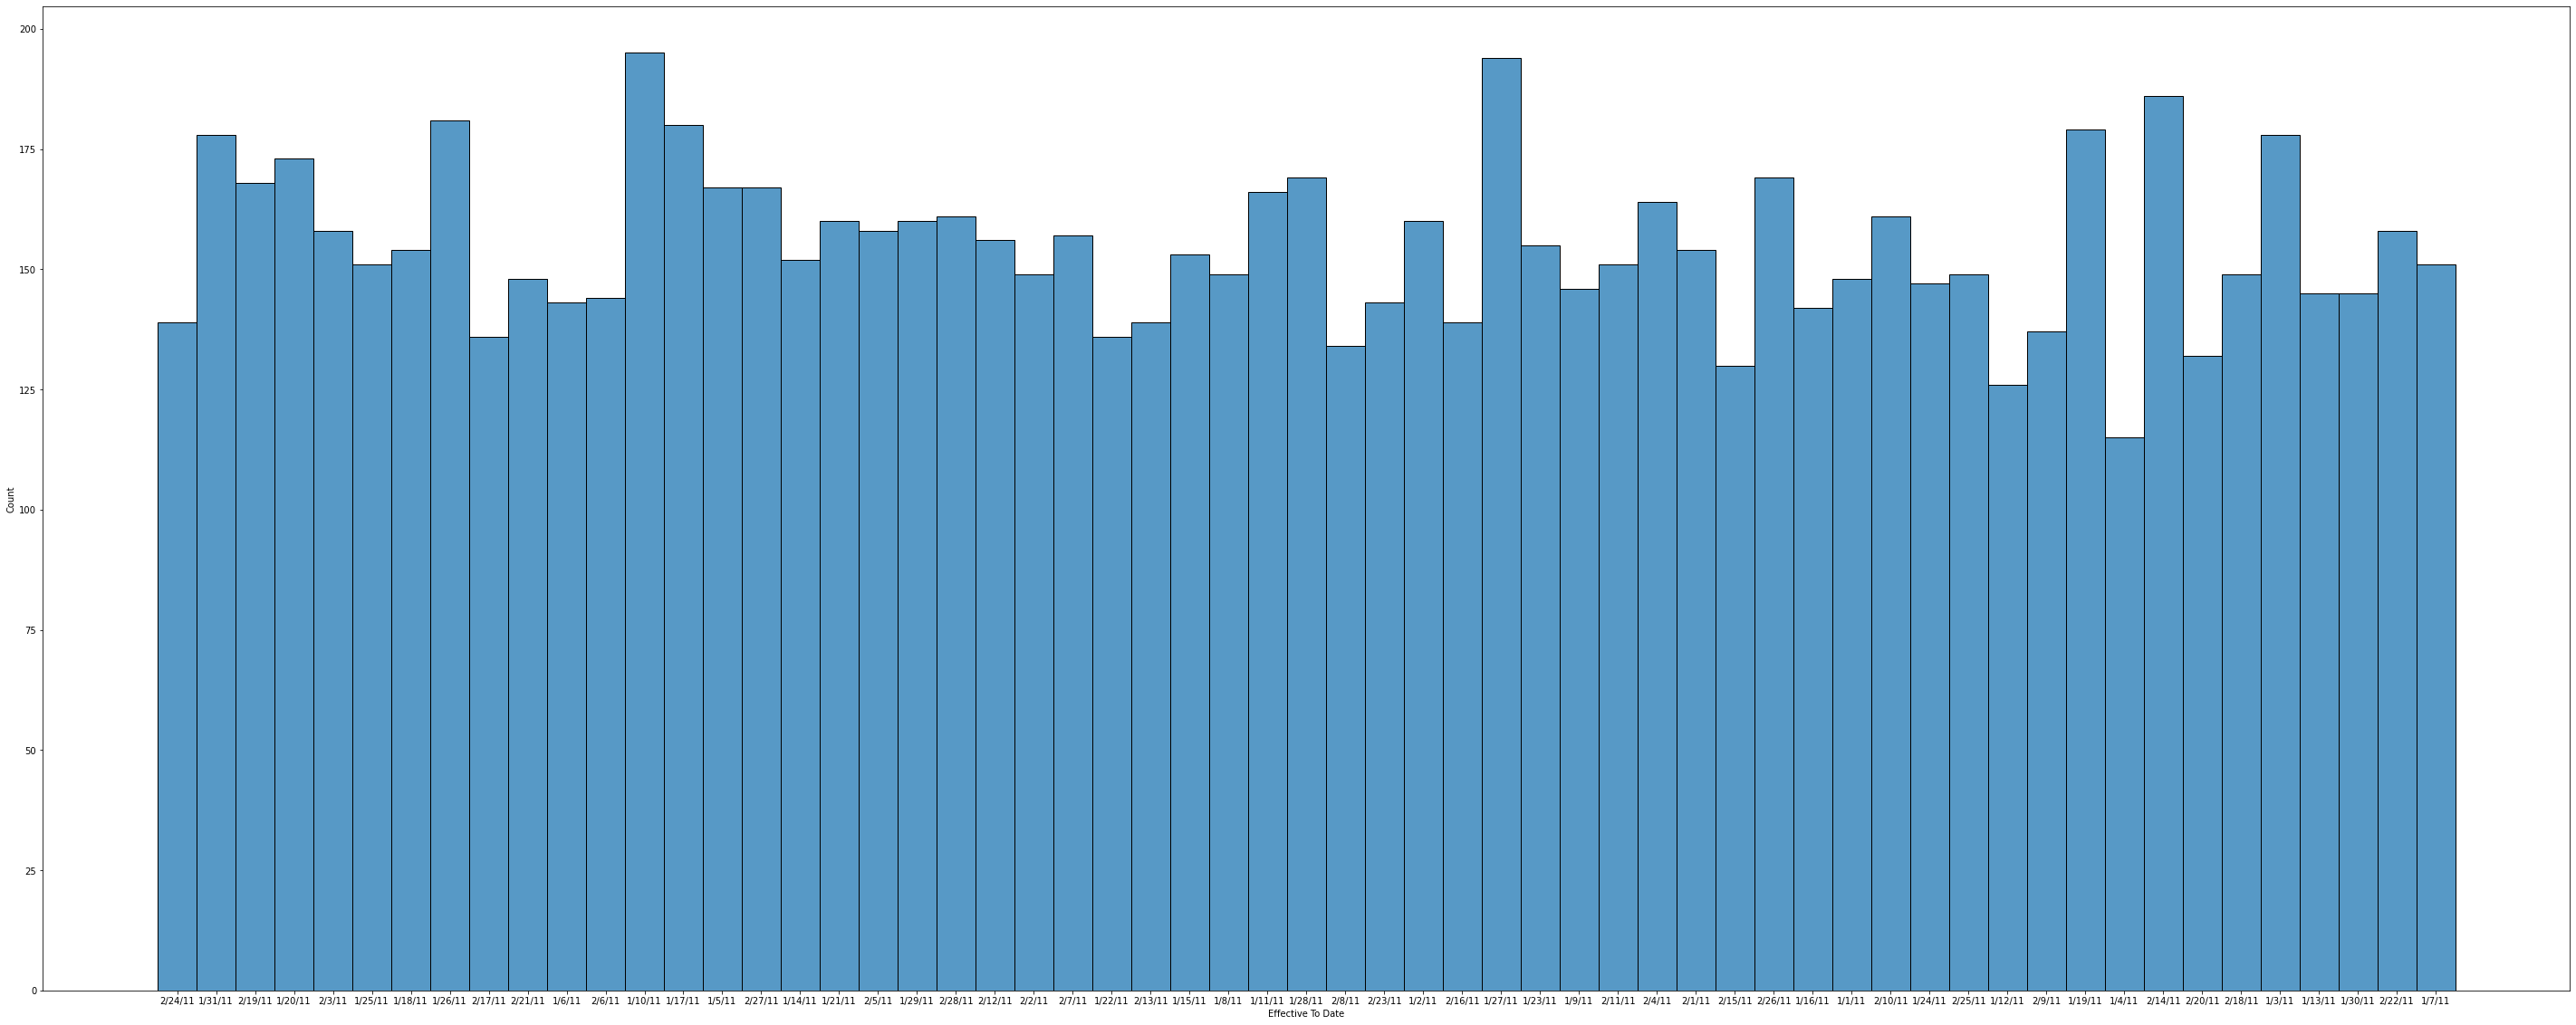

In [95]:
#Plot time variable. Can you extract something from it?
plt.figure(figsize=(50,20))
sns.histplot(data=customer_df, x="Effective To Date")